In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-prediction/Churn.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [3]:
data=pd.read_csv('/kaggle/input/churn-prediction/Churn.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Feature Engineering and Visualization

In [5]:
#Converting ' ' to Nan and dropping rows
data[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', float('NaN'), regex = True)

In [7]:
data.dropna(inplace = True)

In [8]:
#ChangingObjectDataTypeToFloat
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],downcast='float')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


<AxesSubplot:xlabel='tenure', ylabel='Count'>

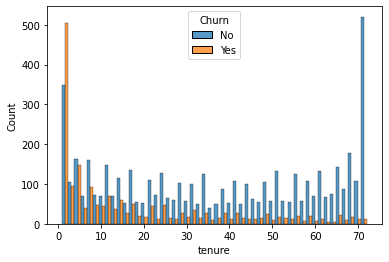

In [10]:
sb.histplot(x='tenure',hue='Churn',data=data,multiple='dodge',bins=50)

Above histplot indicates that customers with tenure less than five months churn more. 

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

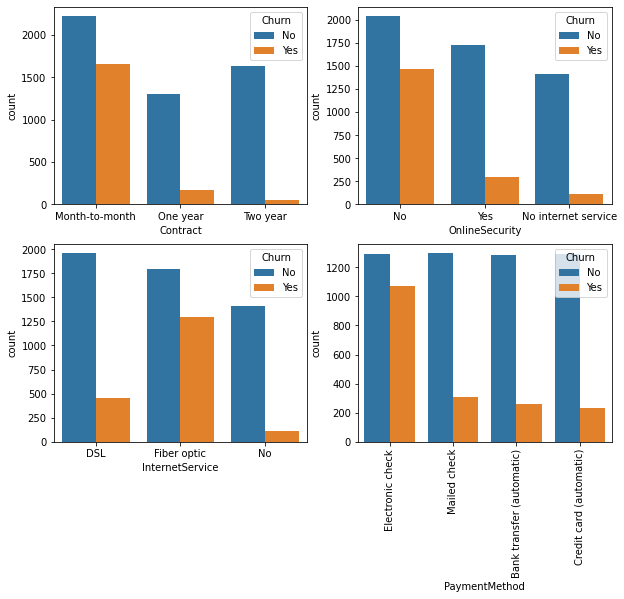

In [11]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)   
sb.countplot(x='Contract',data=data,hue='Churn')
plt.subplot(2,2,2)   
sb.countplot(x='OnlineSecurity',data=data,hue='Churn')
plt.subplot(2,2,3)   
sb.countplot(x='InternetService',data=data,hue='Churn')
plt.subplot(2,2,4)   
sb.countplot(x='PaymentMethod',data=data,hue='Churn')
plt.xticks(rotation='vertical')
plt.tight_layout

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

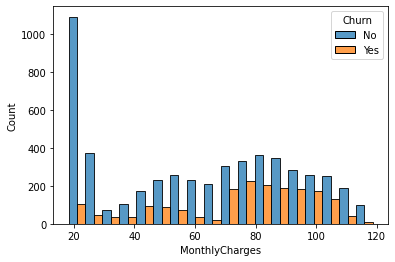

In [12]:
sb.histplot(x='MonthlyCharges',hue='Churn',data=data,multiple='dodge')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

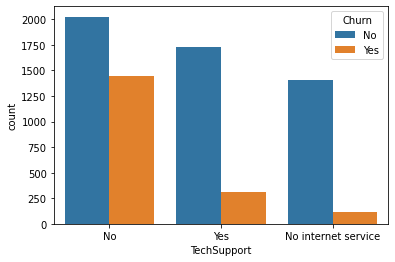

In [13]:
sb.countplot(data['TechSupport'],hue=data['Churn'])

Customers without tech support seem to churn more than others. 

In [14]:
#CategoricalVariables-LabelEncoding
def label_encode(df):
    for cols in df.columns:
        if df[cols].dtype == 'O':
            if cols not in ['customerID','TotalCharges']:
                df[cols]=LabelEncoder().fit_transform(df[cols])

label_encode(data)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  


In [15]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtypes

        if col_type in numerics:
            c_min = df[col].min()
            
            c_max = df[col].max()
            

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print('Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))

In [16]:
reduce_mem_usage(data)

Mem. usage decreased to 0.53 Mb (62.0% reduction)


Customer Lifetime Value(CLTV) Calculation:

CLTV indicates the total revenue/profit from the customer over the period of relationship with the company. This can be calculated by: CLTV=Customer_value * Profit_margin/Churn_rate
where Customer_value=Average_Order_Value * Purchase_frequency and Churn_rate=1-Repeat_rate 


In [17]:
data['Transaction']=data['TotalCharges']/data['MonthlyCharges']

In [18]:
cltv_data=data.groupby(['customerID']).agg({'Transaction':lambda x:x.sum().round(0),
                                  'TotalCharges':lambda x:x.sum()})

In [19]:
def calc_cltv(df,profit_percent):
    
    #Average_Order_Value = Total Charges / Total Transactions
    #Purchase_frequency = Total Transactions / Total No.Of Customers
    df['Customer_value']=(df['TotalCharges']/df['Transaction'])*(df['Transaction']/df.shape[0])
    
    #Profit_margin = Total Charges * profit_percent
    df['Profit_margin']=df['TotalCharges']*0.05
    
    #Churn_rate = 1 - Repeat_rate
    #Repeat_rate = Total No. of customers who didn't churn(Transaction>1) / Total No. of customers
    Repeat_rate=df[df['Transaction']>1].shape[0]/df.shape[0]
    Churn_rate=1-Repeat_rate
    
    #CLTV=Customer_value * Profit_margin/Churn_rate
    df['CLTV']=df['Customer_value']*df['Profit_margin']/Churn_rate
    df=df.reset_index()
    
    #Scaling
    scaler=MinMaxScaler(feature_range=(0,1))
    scaled_cltv=scaler.fit_transform(df[['Transaction', 'TotalCharges', 'Profit_margin',
       'Customer_value', 'CLTV']])
    
    scaled_cltv=pd.DataFrame(scaled_cltv,columns=['Transaction', 'TotalCharges', 'Profit_margin',
       'Customer_value', 'CLTV'])
    scaled_cltv['customerID']=df['customerID']
    clt=pd.merge(scaled_cltv,data[['customerID','Churn']],how='left',on='customerID')
    #Customer Segmentation based on CLTV
    clt['bucket']=pd.qcut(clt['CLTV'],q=4,labels=['very low revenue','low revenue','moderate revenue','high revenue'])
    
    return clt

clt=calc_cltv(cltv_data,0.05)
    

Based on the CLTV calculated, customers are segmented into 4 categories.
'very low revenue'<'low revenue'<'moderate revenue'<'high revenue'

Higher the CLTV, higher the revenue.

In [20]:
clt[clt['Churn']==1].groupby('bucket').agg({'bucket':lambda x:x.count()})


,bucket
bucket,
very low revenue,764
low revenue,445
moderate revenue,405
high revenue,255


In [21]:
clt[clt['Churn']==0].groupby('bucket').agg({'bucket':lambda x:x.count()})

,bucket
bucket,
very low revenue,994
low revenue,1313
moderate revenue,1353
high revenue,1503


Customer with low revenue/profit have churned more than other customers.